In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

#den oberen Teil kennt man schon vom letzten Mal...
#Theano kommt neu dazu - 
#Library für effiziente Berechnungen mit großen Matrizen -> DeepLearning!
import theano 
import tensorflow

 
#Jetzt noch scikit-learn:
#hier stecken viele Funktionalitäten drin, die man gut brauchen kann: 
#Fehlerfunktionen, Standard-Modelltypen, Preprocessing-Algorithmen, Daten... 

import sklearn as sl 
from sklearn import model_selection, metrics, datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
#Import wichtiger Keras Funktionalitäten

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.utils import to_categorical
from keras.optimizers import SGD #Stochastic Gradient Descent

import pickle

2023-01-21 15:15:00.954415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# prepare gray scale data
data_gray_file = open('./archive/data6.pickle', 'rb')
data_gray = pickle.load(data_gray_file, encoding='latin1')
data_gray_file.close()

# Preparing y_train and y_validation for use in Keras
data_gray['y_train'] = to_categorical(data_gray['y_train'], num_classes=43)
data_gray['y_validation'] = to_categorical(data_gray['y_validation'], num_classes=43)


# prepare color data
data_color_file = open('./archive/data1.pickle', 'rb')
data_color = pickle.load(data_color_file, encoding='latin1')
data_color_file.close()

# Preparing y_train and y_validation for use in Keras
data_color['y_train'] = to_categorical(data_color['y_train'], num_classes=43)
data_color['y_validation'] = to_categorical(data_color['y_validation'], num_classes=43)


In [17]:
# Transpose data to have channel at the end
x_train_gray = data_gray['x_train'].transpose(0, 2, 3, 1)
x_train_color = data_color['x_train'].transpose(0, 2, 3, 1)

x_test_gray = data_gray['x_test'].transpose(0, 2, 3, 1)
x_test_color = data_color['x_test'].transpose(0, 2, 3, 1)

x_validation_gray = data_gray['x_validation'].transpose(0, 2, 3, 1)
x_validation_color = data_color['x_validation'].transpose(0, 2, 3, 1)

# one hot encoding
#y_train_gray = to_categorical(data_gray['y_train'], num_classes=43)
y_train_gray = data_gray['y_train']
y_train_color = to_categorical(data_color['y_train'], num_classes=43)
y_test_gray = to_categorical(data_gray['y_test'], num_classes=43)
#y_test_gray = data_gray['y_test']
y_test_color = to_categorical(data_color['y_test'], num_classes=43)

print('x_train_gray.shape: ' + str(x_train_gray.shape))
print('x_train_color.shape: ' + str(x_train_color.shape))
print('x_test_gray.shape: ' + str(x_test_gray.shape))
print('x_test_color.shape: ' + str(x_test_color.shape))


print('y_train_gray.shape: ' + str(y_train_gray.shape))
print('y_train_color.shape: ' + str(y_train_color.shape))
print('y_test_gray.shape: ' + str(y_test_gray.shape))
print('y_test_color.shape: ' + str(y_test_color.shape))

x_train_gray.shape: (86989, 32, 32, 1)
x_train_color.shape: (86989, 32, 32, 3)
x_test_gray.shape: (12630, 32, 32, 1)
x_test_color.shape: (12630, 32, 32, 3)
y_train_gray.shape: (86989, 43)
y_train_color.shape: (86989, 43, 43)
y_test_gray.shape: (12630, 43)
y_test_color.shape: (12630, 43)


In [6]:
def plotConfusionMatrix(y_true, y_pred):
    y_pred1 = np.argmax(y_pred, axis=1)
    y_true1=np.argmax(y_true, axis=1)

    cm = confusion_matrix(y_true=y_true1, y_pred=y_pred1)

    plt.figure(figsize=(14,12))
    sns.heatmap(cm, cmap=mpl.cm.Blues)

# DNN

Daten reshapen damit sie als Vektor statt als 4D Array vorliegen

In [18]:
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], 1*32*32)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], 1*32*32)
x_validation = x_validation_gray.reshape(x_validation_gray.shape[0], 1*32*32)

print(x_train_gray.shape)

(86989, 1024)


### Dropouts

Epoch 1/250
680/680 [==============================] - 3s 4ms/step - loss: 1.9185 - accuracy: 0.5106 - val_loss: 1.1825 - val_accuracy: 0.6880
Epoch 2/250
680/680 [==============================] - 3s 4ms/step - loss: 0.9810 - accuracy: 0.7804 - val_loss: 0.9795 - val_accuracy: 0.7477
Epoch 3/250
680/680 [==============================] - 3s 4ms/step - loss: 0.7536 - accuracy: 0.8331 - val_loss: 0.7942 - val_accuracy: 0.8041
Epoch 4/250
680/680 [==============================] - 3s 4ms/step - loss: 0.6278 - accuracy: 0.8579 - val_loss: 0.8146 - val_accuracy: 0.7941
Epoch 5/250
680/680 [==============================] - 3s 4ms/step - loss: 0.5341 - accuracy: 0.8768 - val_loss: 0.7467 - val_accuracy: 0.8106
Epoch 6/250
680/680 [==============================] - 3s 4ms/step - loss: 0.4706 - accuracy: 0.8874 - val_loss: 0.7197 - val_accuracy: 0.8245
Epoch 7/250
680/680 [==============================] - 3s 4ms/step - loss: 0.4146 - accuracy: 0.8995 - val_loss: 0.7053 - val_accuracy: 0.8393

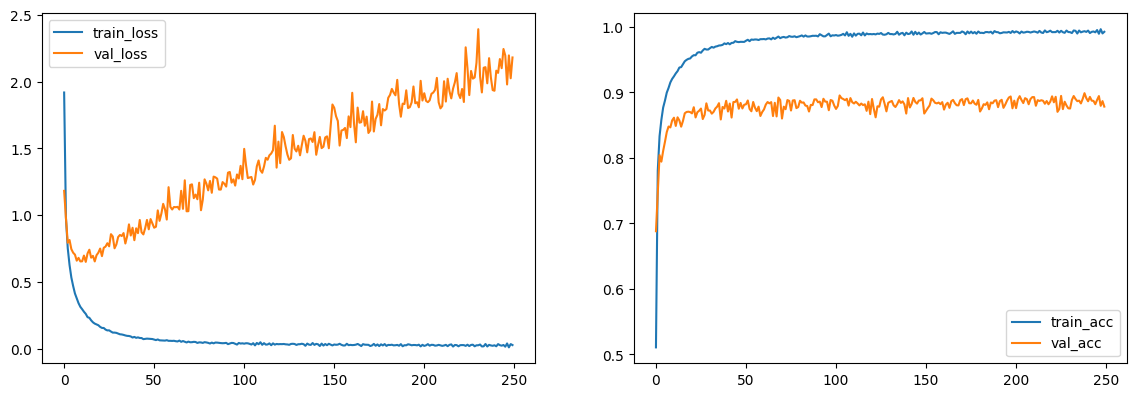

In [33]:
dnn_no_dropout = Sequential()

dnn_no_dropout.add(Dense(64, activation='relu', input_dim=(32*32*1)))
dnn_no_dropout.add(Dense(32, activation='relu'))
dnn_no_dropout.add(Dense(64, activation='relu'))
dnn_no_dropout.add(Dense(43, activation='softmax'))


dnn_no_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_no_dropout_history = dnn_no_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_no_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_no_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/250
680/680 [==============================] - 5s 7ms/step - loss: 3.5220 - accuracy: 0.0555 - val_loss: 2.8333 - val_accuracy: 0.2038
Epoch 2/250
680/680 [==============================] - 5s 7ms/step - loss: 3.0600 - accuracy: 0.1068 - val_loss: 2.5416 - val_accuracy: 0.2652
Epoch 3/250
680/680 [==============================] - 6s 8ms/step - loss: 2.9494 - accuracy: 0.1279 - val_loss: 2.4803 - val_accuracy: 0.3044
Epoch 4/250
680/680 [==============================] - 5s 8ms/step - loss: 2.9011 - accuracy: 0.1404 - val_loss: 2.4159 - val_accuracy: 0.3273
Epoch 5/250
680/680 [==============================] - 6s 8ms/step - loss: 2.8556 - accuracy: 0.1544 - val_loss: 2.3370 - val_accuracy: 0.3395
Epoch 6/250
680/680 [==============================] - 7s 10ms/step - loss: 2.8319 - accuracy: 0.1640 - val_loss: 2.3507 - val_accuracy: 0.3023
Epoch 7/250
680/680 [==============================] - 8s 11ms/step - loss: 2.8085 - accuracy: 0.1708 - val_loss: 2.4024 - val_accuracy: 0.26

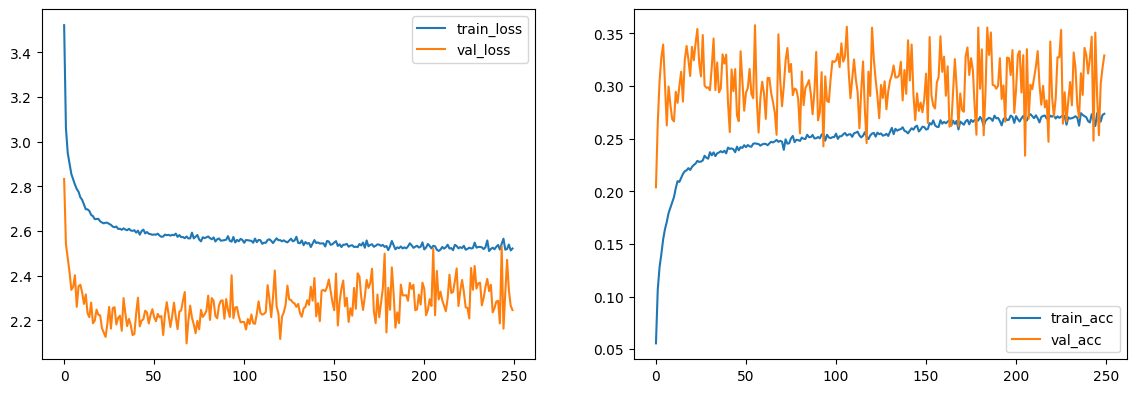

In [35]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(256, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(128, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(64, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Zu großer Dropout & zu kleines Netz für die komplexen Daten

In [36]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(800, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(400, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(200, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/250
680/680 [==============================] - 20s 29ms/step - loss: 2.8319 - accuracy: 0.1942 - val_loss: 1.5610 - val_accuracy: 0.5721
Epoch 2/250
680/680 [==============================] - 22s 32ms/step - loss: 1.7698 - accuracy: 0.4558 - val_loss: 1.0669 - val_accuracy: 0.7150
Epoch 3/250
680/680 [==============================] - 19s 28ms/step - loss: 1.4655 - accuracy: 0.5542 - val_loss: 0.9158 - val_accuracy: 0.7367
Epoch 4/250
680/680 [==============================] - 20s 29ms/step - loss: 1.3145 - accuracy: 0.6024 - val_loss: 0.7948 - val_accuracy: 0.7722
Epoch 5/250
680/680 [==============================] - 19s 28ms/step - loss: 1.2397 - accuracy: 0.6244 - val_loss: 0.7923 - val_accuracy: 0.7587
Epoch 6/250
680/680 [==============================] - 20s 29ms/step - loss: 1.1709 - accuracy: 0.6484 - val_loss: 0.7164 - val_accuracy: 0.7930
Epoch 7/250
680/680 [==============================] - 21s 31ms/step - loss: 1.1219 - accuracy: 0.6639 - val_loss: 0.7720 - val_ac